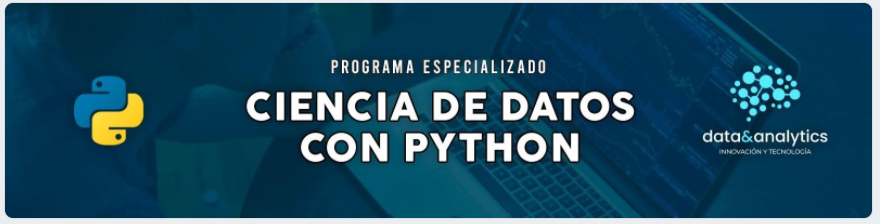

#DATA & ANALYTICS

----------------------------
SESIÓN 05. METODOS DE INTERDEPENDENCIA - MULTIVARIABLE (NO SUPERVISADOS)

Instructor: Ing. Yaneth Ccahuantico

E-mail: yane.data@gmail.com

Web: www.datayanalytics.com

In [ ]:
# Tratamiento de datos

import numpy as np
import pandas as pd
import statsmodels.api as sm

# Gráficos

import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
import seaborn as sns
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado

from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# Configuración warnings

import warnings
warnings.filterwarnings('ignore')

# DATA

In [ ]:
#cargamos la data desde Drive

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/PROGRAMA DS PYTHON - INSTR/Sesion Nº 14/Data/Data_Nutricion.xlsx', sheet_name='Hoja1')
df.head(10)

,Individuo,talla,edad,peso_kg,circun_cuello,IMC,circun_cintura,cadera,ind_cintura_cadera,ind_cintura_estatura,por_grasa_corporal,masa_corporal_magra_kg,pliegue_cutaneo_BICEPS,pliegue_cutaneo_TRICEPS,pliegue_cutaneo_ESCAPULAR,pliegue_cutaneo_SUPRAILIACO
0,Persona 1,155.7,16,71.2,35.7,29.576170,90.0,98.0,0.918367,0.578035,36.446202,45.250304,13.0,27.0,32.0,34.0
1,Persona 2,166.5,16,61.0,31.8,22.364707,80.9,100.5,0.804975,0.485886,28.790714,43.437664,5.0,19.0,15.0,22.0
2,Persona 3,151.3,16,49.1,30.5,21.623567,72.0,86.0,0.837209,0.475876,29.867419,34.435097,13.0,18.0,18.0,17.0
3,Persona 4,151.7,16,54.6,32.6,23.117479,74.4,88.4,0.841629,0.490442,27.867640,39.384269,5.0,19.0,15.0,18.0
4,Persona 5,160.3,16,58.0,30.1,22.260196,79.6,97.9,0.813075,0.496569,30.276688,40.439521,10.0,19.0,20.0,19.0
5,Persona 6,162.4,16,70.8,33.9,26.124451,86.5,106.1,0.815269,0.532635,31.439726,48.540674,11.0,25.0,18.0,20.0
6,Persona 7,167.0,16,47.4,30.5,17.318656,66.7,81.5,0.818405,0.399401,9.690057,42.806913,3.5,7.0,6.0,6.0
7,Persona 8,158.7,16,49.3,31.2,18.979031,69.3,83.2,0.832933,0.436673,16.358858,41.235083,5.5,12.0,10.5,11.5
8,Persona 9,158.2,16,91.0,37.5,35.521296,107.5,116.0,0.926724,0.679520,34.760913,59.367569,25.0,21.0,25.0,23.0
9,Persona 10,171.0,16,50.4,30.8,17.543860,66.0,80.0,0.825000,0.385965,12.045941,44.328846,3.0,7.0,8.5,9.0


In [ ]:
columns = df.select_dtypes(exclude=['object']).columns  # columnas numèrica solamente

data_nutricion = df[columns]
data_nutricion.head(10)

,talla,edad,peso_kg,circun_cuello,IMC,circun_cintura,cadera,ind_cintura_cadera,ind_cintura_estatura,por_grasa_corporal,masa_corporal_magra_kg,pliegue_cutaneo_BICEPS,pliegue_cutaneo_TRICEPS,pliegue_cutaneo_ESCAPULAR,pliegue_cutaneo_SUPRAILIACO
0,155.7,16,71.2,35.7,29.576170,90.0,98.0,0.918367,0.578035,36.446202,45.250304,13.0,27.0,32.0,34.0
1,166.5,16,61.0,31.8,22.364707,80.9,100.5,0.804975,0.485886,28.790714,43.437664,5.0,19.0,15.0,22.0
2,151.3,16,49.1,30.5,21.623567,72.0,86.0,0.837209,0.475876,29.867419,34.435097,13.0,18.0,18.0,17.0
3,151.7,16,54.6,32.6,23.117479,74.4,88.4,0.841629,0.490442,27.867640,39.384269,5.0,19.0,15.0,18.0
4,160.3,16,58.0,30.1,22.260196,79.6,97.9,0.813075,0.496569,30.276688,40.439521,10.0,19.0,20.0,19.0
5,162.4,16,70.8,33.9,26.124451,86.5,106.1,0.815269,0.532635,31.439726,48.540674,11.0,25.0,18.0,20.0
6,167.0,16,47.4,30.5,17.318656,66.7,81.5,0.818405,0.399401,9.690057,42.806913,3.5,7.0,6.0,6.0
7,158.7,16,49.3,31.2,18.979031,69.3,83.2,0.832933,0.436673,16.358858,41.235083,5.5,12.0,10.5,11.5
8,158.2,16,91.0,37.5,35.521296,107.5,116.0,0.926724,0.679520,34.760913,59.367569,25.0,21.0,25.0,23.0
9,171.0,16,50.4,30.8,17.543860,66.0,80.0,0.825000,0.385965,12.045941,44.328846,3.0,7.0,8.5,9.0


In [ ]:
data_nutricion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   talla                        652 non-null    float64
 1   edad                         652 non-null    int64  
 2   peso_kg                      652 non-null    float64
 3   circun_cuello                652 non-null    float64
 4   IMC                          652 non-null    float64
 5   circun_cintura               652 non-null    float64
 6   cadera                       652 non-null    float64
 7   ind_cintura_cadera           652 non-null    float64
 8   ind_cintura_estatura         652 non-null    float64
 9   por_grasa_corporal           652 non-null    float64
 10  masa_corporal_magra_kg       652 non-null    float64
 11  pliegue_cutaneo_BICEPS       652 non-null    float64
 12  pliegue_cutaneo_TRICEPS      652 non-null    float64
 13  pliegue_cutaneo_ESCA

# ANÁLISIS DE COMPONENTES PRINCIPALES


In [ ]:
data_nutricion.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
talla,652.0,158.81,7.40,135.60,153.78,158.20,163.60,188.60
edad,652.0,14.76,1.05,0.00,14.00,15.00,15.00,17.00
peso_kg,652.0,56.92,8.52,33.90,51.00,55.80,61.70,91.10
circun_cuello,652.0,32.16,2.16,24.50,30.70,32.00,33.50,39.20
IMC,652.0,22.42,3.04,14.54,20.28,22.17,23.91,36.71
circun_cintura,652.0,74.63,6.99,55.00,70.00,73.80,78.00,107.50
cadera,652.0,89.88,7.21,69.80,85.00,89.00,94.00,120.80
ind_cintura_cadera,652.0,0.83,0.05,0.65,0.79,0.83,0.87,1.03
ind_cintura_estatura,652.0,0.47,0.05,0.36,0.44,0.46,0.49,0.70
por_grasa_corporal,652.0,23.50,7.88,4.21,15.89,26.09,30.07,39.45


## Tratamiento de variables 

In [ ]:
# Corregimos la variable edad =0
data_nutricion.loc[data_nutricion['edad'] == 0, 'edad'] = int(data_nutricion['edad'].median())
data_nutricion['edad'] = data_nutricion['edad'].astype('int')

In [ ]:
# identificamos outliers: pliegue_cutaneo_BICEPS 

pc_out = data_nutricion.pliegue_cutaneo_BICEPS.quantile(0.99)
print(pc_out)

data_nutricion.pliegue_cutaneo_BICEPS[data_nutricion.pliegue_cutaneo_BICEPS > pc_out]

# valor sospechoso 90.0

21.49000000000001


8      25.0
19     23.0
72     22.0
187    26.0
362    22.0
386    23.0
398    90.0
Name: pliegue_cutaneo_BICEPS, dtype: float64

In [ ]:
# Corregimos la variable pliegue_cutaneo_BICEPS =90
data_nutricion.loc[data_nutricion['pliegue_cutaneo_BICEPS'] == 90, 'pliegue_cutaneo_BICEPS'] = int(data_nutricion['pliegue_cutaneo_BICEPS'].median())


In [ ]:
def displot_varnum(x: str, data: pd.DataFrame):
    '''
    Devuelve 3 gráficos:
    .Gráfico de Histograma con Curva

    Parámetros
    ----------
    
    `x` : variable numérica.
    `data` : DataFrame
    `v_cat` : variable cualitativa | variable de exploración
    
    Colores por default, definidos en la función

    Ejemplos:
    --------

    '''
   # Histograma con Curva
    sns.color_palette("light:b", as_cmap=True)

    sns.displot(   
        x = x,
        data  = data,
        kde=True,
        color = "#039BE5"
        ).set(title='Gráfico: Histograma con Curva')



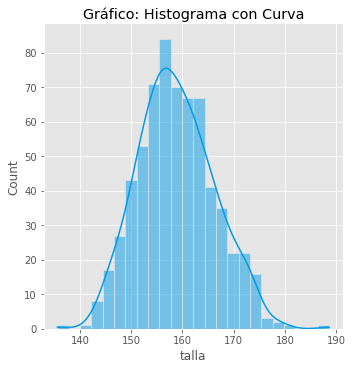

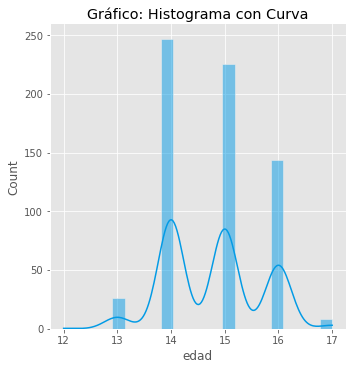

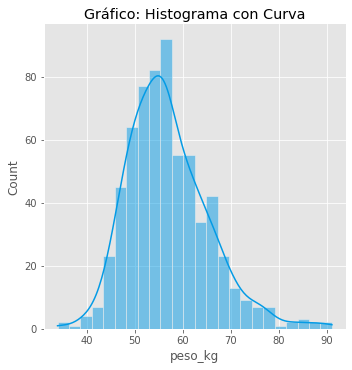

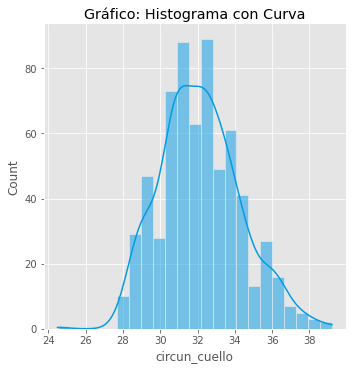

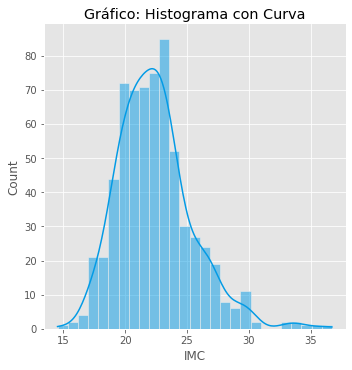

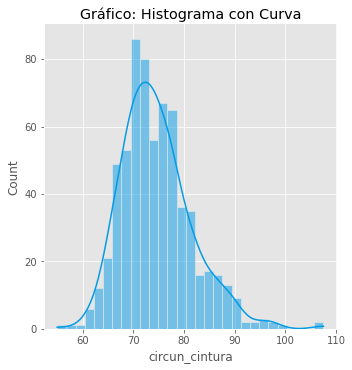

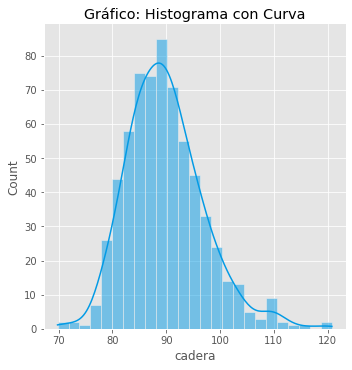

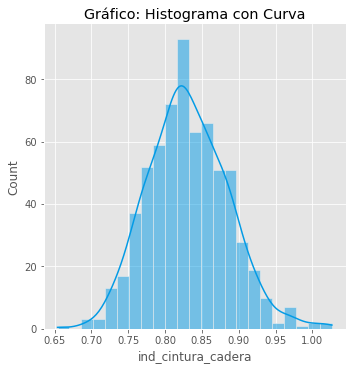

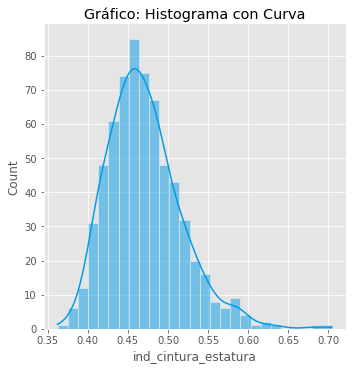

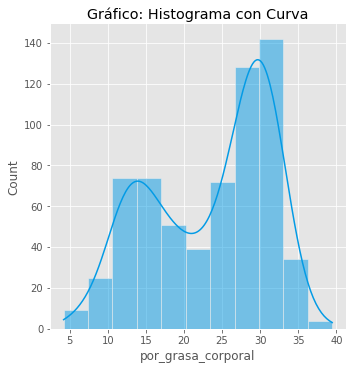

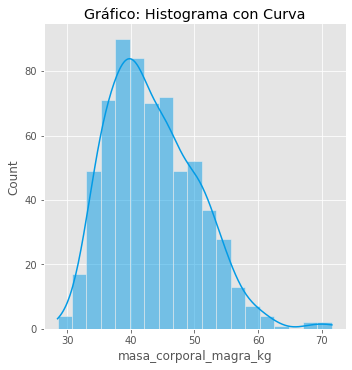

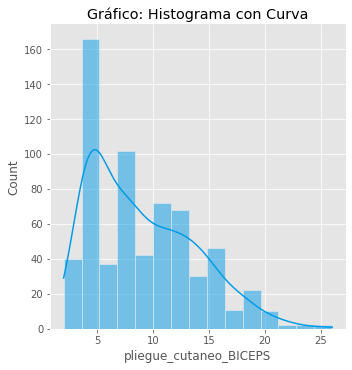

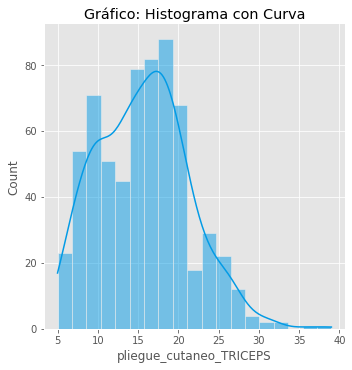

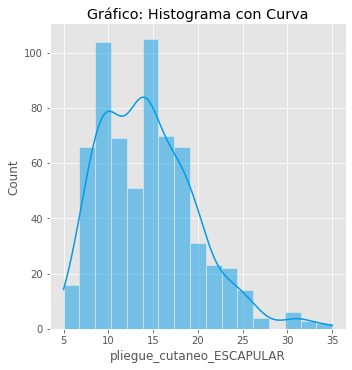

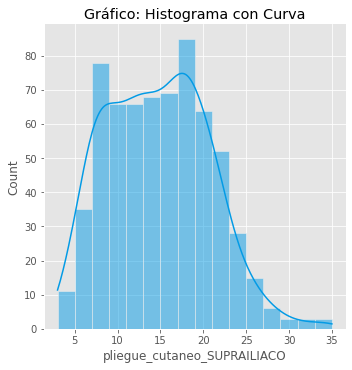

In [ ]:
for i in columns:
  displot_varnum(i, data_nutricion)

In [ ]:
def mean_var(x: float):
  return np.mean(x), np.var(x)

In [ ]:
d= data_nutricion.apply(mean_var, axis=0).T.round(2)
d.columns = ["Media", "Varianza"]
d

,Media,Varianza
talla,158.81,54.62
edad,14.78,0.77
peso_kg,56.92,72.45
circun_cuello,32.16,4.66
IMC,22.42,9.22
circun_cintura,74.63,48.75
cadera,89.88,51.94
ind_cintura_cadera,0.83,0.00
ind_cintura_estatura,0.47,0.00
por_grasa_corporal,23.50,61.97


Text(0.5, 1.0, 'Gráfico Nº XX: Gráfico de la correlación de las variables numéricas')

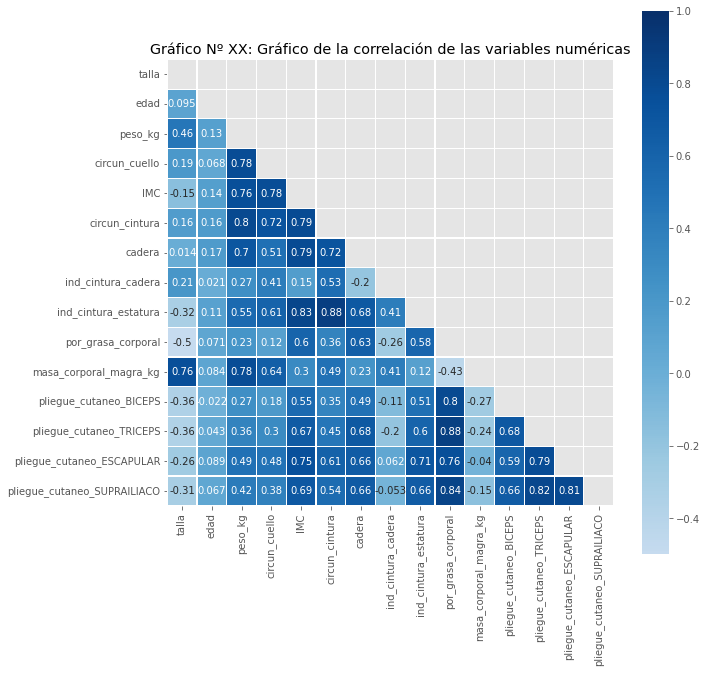

In [ ]:
correlacion = data_nutricion.corr().round(3)

mask = np.triu(np.ones_like(correlacion, dtype=bool )) #la máscara para el triángulo superior del gráfico
f, ax = plt.subplots(figsize = (10,10)) # la base para el gráfico
g = sns.heatmap(correlacion, mask = mask, cmap='Blues', vmax=1, center = 0, 
            square = True, linewidths=.1, annot=True)

g.set_title("Gráfico Nº XX: Gráfico de la correlación de las variables numéricas")

## Entrenamiento

In [ ]:
# Entrenamiento modelo PCA con escalado de los datos

pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(data_nutricion)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']
modelo_pca.components_  # matriz i * j


array([[-6.23947344e-02,  5.08071394e-02,  2.68494447e-01,
         2.48162812e-01,  3.46802487e-01,  3.08971689e-01,
         3.15016014e-01,  5.08954820e-02,  3.24876457e-01,
         2.81743859e-01,  6.29221986e-02,  2.49486401e-01,
         3.00656029e-01,  3.21349482e-01,  3.12256394e-01],
       [ 4.06493352e-01,  6.01187386e-02,  3.19038084e-01,
         2.95358249e-01,  7.29271469e-02,  2.31989128e-01,
         1.99492151e-02,  3.06446758e-01,  3.16720024e-02,
        -3.15613057e-01,  4.97882351e-01, -2.29856763e-01,
        -2.22544193e-01, -9.79586919e-02, -1.68002022e-01],
       [ 3.86577541e-01,  2.34272208e-01,  2.18498598e-01,
        -9.23684814e-02, -1.07957326e-02, -1.63560551e-01,
         3.45507408e-01, -6.53642043e-01, -3.41751117e-01,
         7.89662381e-02,  1.66013028e-01,  7.20549391e-03,
         1.14334702e-01, -3.66409420e-02,  2.91916622e-02],
       [ 8.92283577e-02, -9.50178558e-01,  1.14491380e-01,
         9.46946787e-02,  1.17410120e-02, -7.51899715

In [ ]:
# Se combierte el array a dataframe para añadir nombres a los ejes.
componentes = pd.DataFrame(
    data    = modelo_pca.components_,
    columns = data_nutricion.columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15']
)

componentes = componentes.transpose().round(3)
componentes

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
talla,-0.062,0.406,0.387,0.089,-0.516,-0.133,0.128,0.005,0.049,-0.314,0.297,-0.237,-0.115,-0.212,-0.263
edad,0.051,0.060,0.234,-0.950,-0.032,0.006,-0.175,-0.011,0.023,-0.003,-0.057,0.020,0.007,-0.001,-0.001
peso_kg,0.268,0.319,0.218,0.114,-0.070,0.063,-0.074,0.024,0.002,0.471,-0.008,0.279,0.629,-0.229,-0.052
circun_cuello,0.248,0.295,-0.092,0.095,0.343,-0.169,-0.507,-0.161,0.092,-0.539,0.127,0.298,0.026,-0.020,-0.002
IMC,0.347,0.073,-0.011,0.012,0.301,0.103,-0.222,0.039,0.027,0.273,0.403,-0.692,-0.064,0.040,0.022
circun_cintura,0.309,0.232,-0.164,-0.075,-0.093,0.162,0.377,-0.007,0.006,-0.173,0.011,-0.004,-0.056,-0.240,0.742
cadera,0.315,0.020,0.346,0.022,0.208,0.236,0.425,0.008,-0.097,-0.283,-0.062,0.005,0.191,0.587,-0.160
ind_cintura_cadera,0.051,0.306,-0.654,-0.132,-0.382,-0.081,0.019,-0.010,0.134,0.066,0.087,-0.029,0.169,0.478,-0.134
ind_cintura_estatura,0.325,0.032,-0.342,-0.116,0.162,0.220,0.298,-0.003,-0.020,-0.025,-0.122,0.070,-0.209,-0.450,-0.576
por_grasa_corporal,0.282,-0.316,0.079,-0.014,-0.186,0.009,0.036,-0.026,0.041,0.197,0.619,0.490,-0.315,0.119,0.008


### Función de los componentes

PC1 = -0.058310*talla + 0.051844*edad + 0.274451*peso_kg + ...


### Influencia de las variables en cada componetes

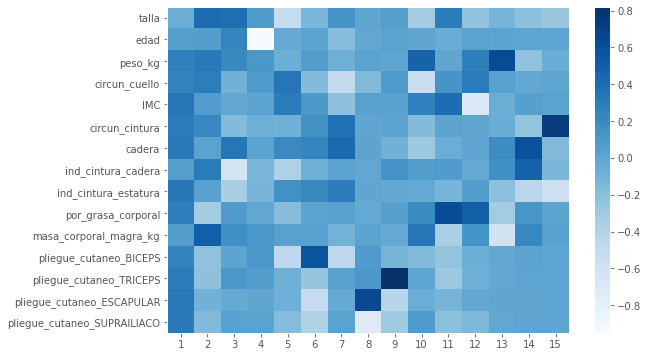

In [ ]:
# Heatmap de los 15 componentes

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9, 6))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='Blues', aspect='auto')   # cmap= "viridis" "#69d" 
plt.yticks(range(len(data_nutricion.columns)), data_nutricion.columns)
plt.xticks(range(len(data_nutricion.columns)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();

### Varianza explicada de cada componente

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[4.83640506e-01 2.40693996e-01 8.38936508e-02 6.54600005e-02
 3.66095450e-02 2.71195958e-02 2.55965640e-02 1.17189101e-02
 1.07280137e-02 7.80503603e-03 4.08038461e-03 2.24219414e-03
 2.15853317e-04 1.51739674e-04 4.40096100e-05]


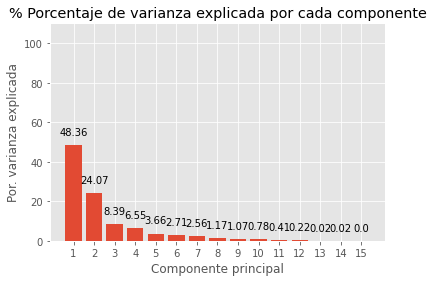

In [ ]:
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(modelo_pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_*100
)

for x, y in zip(np.arange(len(data_nutricion.columns)) + 1, modelo_pca.explained_variance_ratio_*100):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1*100)
ax.set_title('% Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.48364051 0.7243345  0.80822815 0.87368815 0.9102977  0.93741729
 0.96301386 0.97473277 0.98546078 0.99326582 0.9973462  0.9995884
 0.99980425 0.99995599 1.        ]


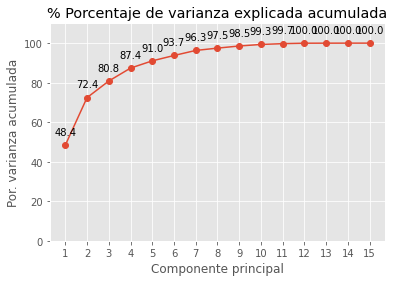

In [ ]:
# Porcentaje de varianza explicada acumulada

prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(data_nutricion.columns)) + 1,
    prop_varianza_acum*100,
    marker = 'o'
)

for x, y in zip(np.arange(len(data_nutricion.columns)) + 1, prop_varianza_acum*100):
    label = round(y, 1)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1*100)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('% Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

# ANALISIS CLUSTER

In [ ]:
# Tratamiento de datos

import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.datasets import make_blobs

# Gráficos

import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado

from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score

# Configuración warnings

import warnings
warnings.filterwarnings('ignore')

np.random.seed(12345)

In [ ]:
data_nutricion.sample(6)


,talla,edad,peso_kg,circun_cuello,IMC,circun_cintura,cadera,ind_cintura_cadera,ind_cintura_estatura,por_grasa_corporal,masa_corporal_magra_kg,pliegue_cutaneo_BICEPS,pliegue_cutaneo_TRICEPS,pliegue_cutaneo_ESCAPULAR,pliegue_cutaneo_SUPRAILIACO
240,154.6,15,55.8,31.1,22.885919,72.5,88.0,0.823864,0.468952,31.624870,38.153323,9.0,21.0,21.0,24.0
463,162.3,14,52.5,30.8,18.222342,71.0,83.0,0.855422,0.437461,10.686873,46.889392,4.0,7.0,8.5,5.0
504,157.7,14,58.4,33.4,23.442567,78.0,93.5,0.834225,0.494610,31.252208,40.148711,13.0,21.0,19.0,20.0
414,164.4,14,50.0,31.5,19.424761,68.4,80.5,0.849689,0.416058,11.385020,44.307490,3.0,8.0,7.5,7.5
573,151.0,14,51.7,30.5,22.192009,71.0,86.1,0.824623,0.470199,30.772603,35.790564,16.0,20.0,16.0,18.5
491,167.7,14,55.4,31.7,19.378956,72.5,82.5,0.878788,0.432320,12.467807,48.492835,4.0,8.0,9.5,7.0


In [ ]:
# Estandarización de las variables
# ==============================================================================
datos_scaled = scale(X=data_nutricion, axis=0, with_mean=True, with_std=True) 

datos_scaled = pd.DataFrame(datos_scaled, 
                            columns=data_nutricion.columns, 
                            index=data_nutricion.index)
datos_scaled.head(4)

,talla,edad,peso_kg,circun_cuello,IMC,circun_cintura,cadera,ind_cintura_cadera,ind_cintura_estatura,por_grasa_corporal,masa_corporal_magra_kg,pliegue_cutaneo_BICEPS,pliegue_cutaneo_TRICEPS,pliegue_cutaneo_ESCAPULAR,pliegue_cutaneo_SUPRAILIACO
0,-0.421047,1.383628,1.677698,1.641765,2.357629,2.201726,1.126584,1.598662,2.329321,1.644111,0.267528,0.841331,1.995844,3.321753,3.247533
1,1.040333,1.383628,0.479386,-0.165065,-0.017224,0.898448,1.473488,-0.480039,0.331455,0.671618,0.006891,-0.865215,0.589424,0.116258,1.230490
2,-1.016425,1.383628,-0.918645,-0.767341,-0.261293,-0.376187,-0.538551,0.110876,0.114426,0.808394,-1.287573,0.841331,0.413621,0.681934,0.390055
3,-0.962299,1.383628,-0.272496,0.205567,0.230676,-0.032466,-0.205524,0.191897,0.430228,0.554358,-0.575940,-0.865215,0.589424,0.116258,0.558142


In [ ]:
# Cálculo de distancias

print('------------------')
print('Distancia euclídea')
print('------------------')
distancias = pairwise_distances(
                X      = datos_scaled,
                metric ='euclidean'
             )

# Se descarta la diagonal superior de la matriz
distancias[np.triu_indices(n=distancias.shape[0])] = np.nan

distancias = pd.DataFrame(
                distancias,
                columns=datos_scaled.index,
                index = datos_scaled.index
            )

distancias.head(8)

------------------
Distancia euclídea
------------------


,0,1,2,3,4,5,6,7,8,9,...,642,643,644,645,646,647,648,649,650,651
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6.546383,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7.553119,4.282545,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6.879811,3.118832,2.409724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6.272881,2.047504,2.899453,2.773145,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.723070,3.202859,5.771073,4.721292,3.557027,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,11.887787,6.395788,5.899210,5.734161,6.570116,8.855534,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,9.760051,4.711959,3.650131,3.413088,4.587738,7.053075,2.435491,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Se reestructura la matriz de distancias para poder ordenar los pares de observaciones por orden de distancia.

In [ ]:
# Top n registros más similares

distancias.melt(ignore_index=False, var_name="estado_b", value_name='distancia') \
    .rename_axis("estado_a") \
    .reset_index() \
    .dropna() \
    .sort_values('distancia') \
    .head(10)

,estado_a,estado_b,distancia
23509,37,36,0.621879
112320,176,172,0.647097
361779,571,554,0.659869
20900,36,32,0.695349
20901,37,32,0.722981
270350,422,414,0.725514
326573,573,500,0.764077
320627,495,491,0.782289
154811,287,237,0.792147
226597,353,347,0.792735


### Número óptimo de Clústers

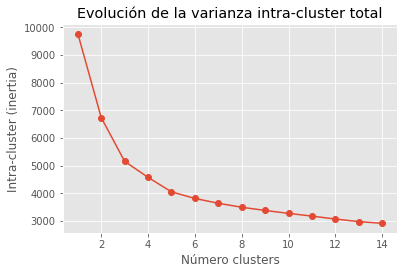

In [ ]:
# Método elbow para identificar el número óptimo de clusters
# ==============================================================================
range_n_clusters = range(1, 15)
inertias = []

for n_clusters in range_n_clusters:
    modelo_kmeans = KMeans(
                        n_clusters   = n_clusters, 
                        n_init       = 20, 
                        random_state = 123
                    )
    modelo_kmeans.fit(datos_scaled)
    inertias.append(modelo_kmeans.inertia_)

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, inertias, marker='o')
ax.set_title("Evolución de la varianza intra-cluster total")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Intra-cluster (inertia)');

Seleccionamos 4 clusters

## Entrenamiento

In [ ]:
kmeans = KMeans(n_clusters=4).fit(datos_scaled)
centroids = kmeans.cluster_centers_
print(centroids)


[[-0.64116349 -0.03442642 -0.5441385  -0.62658591 -0.19158489 -0.45391826
  -0.06252593 -0.57606793 -0.13879323  0.58839137 -0.84335539  0.39271131
   0.31968101  0.05436522  0.24859209]
 [ 1.10086741  0.15775158  0.73588753  0.7111215   0.0306344   0.35685965
  -0.06384163  0.5866197  -0.17734429 -0.81787417  1.29182221 -0.71458205
  -0.57256923 -0.24266431 -0.4629131 ]
 [-0.11800702  0.18809726  1.15367773  1.0699131   1.40338421  1.34509344
   1.27580458  0.34265166  1.3431845   0.96970128  0.37251762  0.90182406
   1.10436782  1.24549881  1.13954693]
 [ 0.41055557 -0.2406267  -0.67549089 -0.42444154 -0.99542651 -0.71829533
  -1.03731037  0.26859036 -0.86905386 -1.34409053  0.16742267 -1.00191854
  -1.17231564 -1.08082251 -1.16238255]]


In [ ]:
kmeans.n_clusters


4

In [ ]:
# cluster al que pertenece cada persona
cluster = kmeans.predict(datos_scaled)
cluster

array([2, 2, 0, 0, 0, 2, 3, 3, 2, 3, 3, 3, 3, 3, 0, 2, 3, 3, 1, 2, 0, 2,
       2, 0, 2, 3, 2, 3, 3, 3, 3, 2, 3, 0, 2, 3, 3, 3, 2, 2, 2, 3, 3, 2,
       0, 2, 3, 0, 0, 1, 0, 0, 2, 2, 3, 3, 2, 1, 3, 0, 1, 0, 2, 1, 0, 1,
       0, 0, 2, 1, 3, 3, 2, 1, 2, 0, 0, 1, 1, 1, 0, 2, 2, 0, 2, 0, 0, 0,
       3, 0, 1, 0, 2, 0, 0, 0, 1, 0, 2, 0, 2, 0, 2, 1, 0, 0, 0, 3, 2, 3,
       2, 1, 0, 0, 0, 1, 3, 2, 1, 0, 1, 0, 0, 1, 0, 0, 3, 1, 0, 2, 0, 0,
       0, 0, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 0, 2, 0, 1, 2, 0, 2, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 3, 0, 1, 0, 3, 3, 3, 0, 0, 0, 3, 3, 2, 0, 0,
       3, 3, 0, 3, 0, 1, 3, 0, 0, 0, 0, 2, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0,
       3, 3, 3, 0, 3, 3, 0, 3, 3, 0, 3, 3, 0, 2, 2, 0, 0, 0, 2, 3, 2, 0,
       0, 0, 3, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0, 3, 2, 0, 3, 0, 3, 0, 0,
       0, 2, 3, 0, 0, 3, 3, 2, 0, 3, 2, 2, 0, 3, 3, 3, 1, 0, 2, 2, 0, 0,
       0, 3, 0, 0, 2, 0, 3, 0, 3, 2, 0, 0, 0, 2, 0, 0, 3, 2, 3, 0, 0, 0,
       0, 3, 3, 1, 0, 2, 0, 2, 2, 1, 1, 3, 3, 3, 3,

## Clúster en DataFrame

In [ ]:
# El cluster en nuestro DataFrame

data_nutricion['cluster'] = cluster
data_nutricion['cluster'].replace({0: "Clúster 0",  # etiquetamos los grupos
                                   1: "Clúster 1",
                                   2: "Clúster 2",
                                   3: "Clúster 3"},
                                  inplace=True)
data_nutricion.head()

,talla,edad,peso_kg,circun_cuello,IMC,circun_cintura,cadera,ind_cintura_cadera,ind_cintura_estatura,por_grasa_corporal,masa_corporal_magra_kg,pliegue_cutaneo_BICEPS,pliegue_cutaneo_TRICEPS,pliegue_cutaneo_ESCAPULAR,pliegue_cutaneo_SUPRAILIACO,cluster
0,155.7,16,71.2,35.7,29.576170,90.0,98.0,0.918367,0.578035,36.446202,45.250304,13.0,27.0,32.0,34.0,Clúster 2
1,166.5,16,61.0,31.8,22.364707,80.9,100.5,0.804975,0.485886,28.790714,43.437664,5.0,19.0,15.0,22.0,Clúster 2
2,151.3,16,49.1,30.5,21.623567,72.0,86.0,0.837209,0.475876,29.867419,34.435097,13.0,18.0,18.0,17.0,Clúster 0
3,151.7,16,54.6,32.6,23.117479,74.4,88.4,0.841629,0.490442,27.867640,39.384269,5.0,19.0,15.0,18.0,Clúster 0
4,160.3,16,58.0,30.1,22.260196,79.6,97.9,0.813075,0.496569,30.276688,40.439521,10.0,19.0,20.0,19.0,Clúster 0


In [ ]:
# Perfilando cada Estrato. Podemos añadir variables cualitativas para su mejor entendimiento.
#---------------------------------------------------------------------------------------------
data_nutricion.groupby(['cluster'])[columns].mean().round(2).T

cluster,Clúster 0,Clúster 1,Clúster 2,Clúster 3
talla,154.07,166.95,157.94,161.85
edad,14.75,14.92,14.95,14.57
peso_kg,52.29,63.18,66.74,51.17
circun_cuello,30.80,33.69,34.47,31.24
IMC,21.84,22.51,26.68,19.39
circun_cintura,71.46,77.12,84.02,69.61
cadera,89.43,89.42,99.08,82.41
ind_cintura_cadera,0.80,0.86,0.85,0.85
ind_cintura_estatura,0.46,0.46,0.53,0.43
por_grasa_corporal,28.14,17.07,31.14,12.92


In [ ]:
# Tabla de frecuencia del Cluster
cluster_count = (data_nutricion
                       .groupby("cluster")
                       .agg(frequency=("cluster", "count")))

cluster_count["Acumulado"] = cluster_count["frequency"].cumsum()
cluster_count

,frequency,Acumulado
cluster,,
Clúster 0,262,262
Clúster 1,114,376
Clúster 2,134,510
Clúster 3,142,652


## Graficando las variables numéricas input

In [ ]:
import seaborn as sns

def graficar_nums(cluster, var_num, data):

  fig, ax = plt.subplots(figsize=(6, 3.84))

  sns.violinplot(
          x     = cluster,
          y     = var_num,
          data  = data,
          #color = "white",
          ax    = ax
      )

  ax.set_title(f'{var_num} por Cluster');

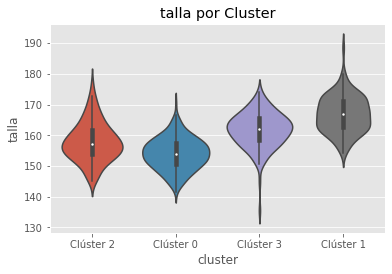

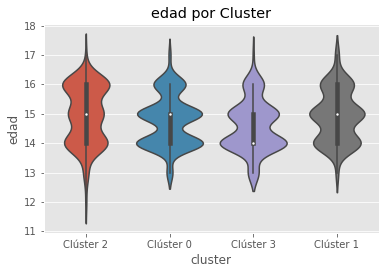

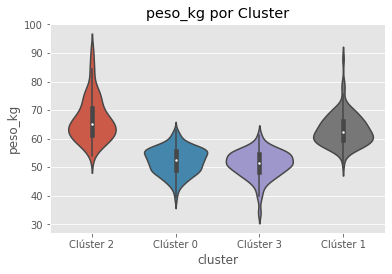

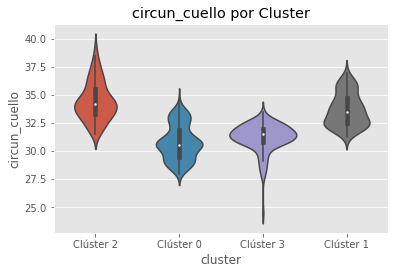

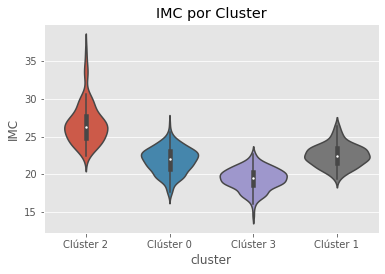

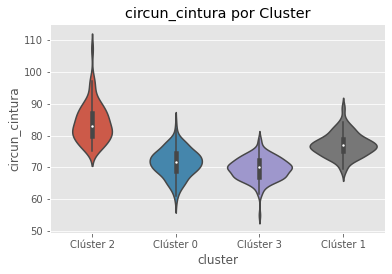

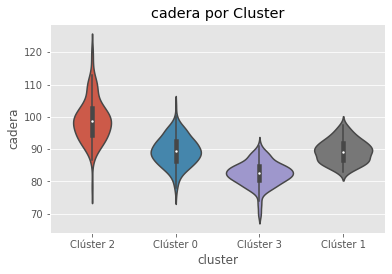

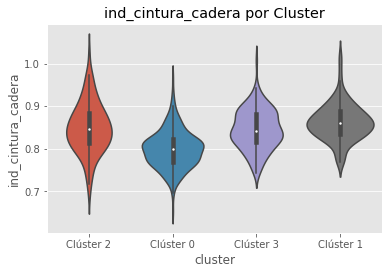

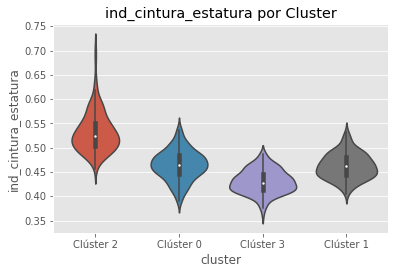

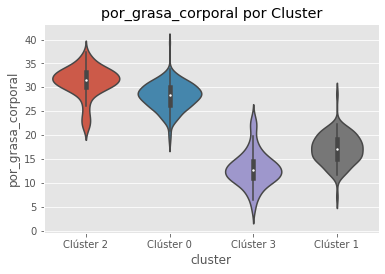

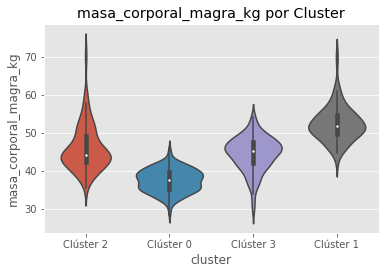

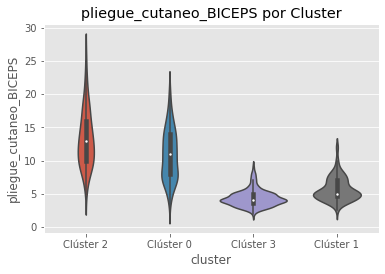

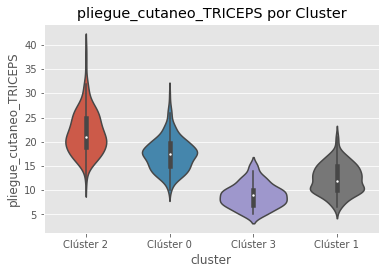

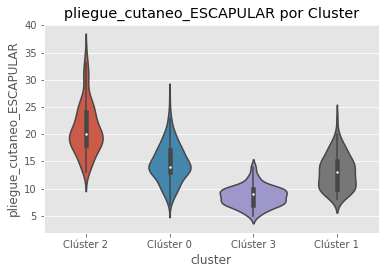

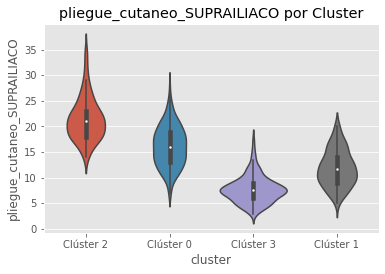

In [ ]:
cluster = 'cluster'

for i in columns: 
  graficar_nums(cluster, i, data_nutricion)

## Prueba

In [ ]:
# ANOVA

import statsmodels.api as sm
from statsmodels.formula.api import ols

mod = ols('edad ~ cluster', data =data_nutricion).fit()
anova = sm.stats.anova_lm(mod, typ=2)

print(anova)

              sum_sq     df        F   PR(>F)
cluster    12.479997    3.0  5.47242  0.00102
Residual  492.593622  648.0      NaN      NaN


In [ ]:
!pip install bioinfokit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.0/87.0 KB 9.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bioinfokit: filename=bioinfokit-2.1.0-py3-none-any.whl size=58662 sha256=217cecc652082c6eb288b5e09aa4df93af21cd8dab83ceb79c1a114485ce17a8
  Stored in directory: /root/.cache/pip/wheels/93/5b/a8/2be2669621c3c344d362eb6703e5fd7b6ece47a6b5ab35b207
Successfully built bioinfokit


## Prueba cada par de Clusters

In [ ]:
# prueba Tukey cada par de grupos.

from bioinfokit.analys import stat

res = stat()
res.tukey_hsd(df=data_nutricion, res_var='edad', xfac_var='cluster', anova_model='edad ~ cluster')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Clúster 2,Clúster 0,0.195853,-0.042657,0.434362,2.991185,0.149369
1,Clúster 2,Clúster 3,0.377339,0.106869,0.647809,5.081962,0.001989
2,Clúster 2,Clúster 1,0.026709,-0.259434,0.312851,0.340007,0.900000
3,Clúster 0,Clúster 3,0.181486,-0.052536,0.415508,2.824913,0.189934
4,Clúster 0,Clúster 1,0.169144,-0.082828,0.421116,2.445257,0.309547
5,Clúster 3,Clúster 1,0.350630,0.068217,0.633043,4.522556,0.007901


www.datayanalytics.com